In [3]:
#import Files
from google.colab import drive


# New Section

In [20]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

In [106]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [82]:
data = pd.read_excel('/content/drive/MyDrive/BSH/Datathon_data_final.xlsx')
data.head()

,Seri_No,Model,error_causing_part1,error_causing_part2,action_done,problem_source,detailed_action,error_causing_part3,Call_Rate,Technical_Call_Rate,...,machine_version,production_date,service,currency,supplier_code,service_cost,call_date_Year,call_date_Month,call_date_Day of month,purchase_date
0,0,0,Other Mechanical Par,Holder,Part sent to customer (self repair),Special requirements,Part(s) added / posted,Fault diagnosis not possible / not made,CR_100,TCR_100,...,SMART,202211,0,EUR,1000045,5.04,2023,Eylül,29,2023-09-17
1,1,1,Gasket,Boot gasket,Part exchanged,mechanical damage or surface damage (Please gi...,Parts exchanged,Tear/torn,CR_100,TCR_100,...,SMART,202202,0,EUR,1000045,161.40,2023,Eylül,29,2022-11-05
2,2,2,"Pump, Drain-",Pump-drain,Part repaired,Fault code or light appearing on the display (...,Cleaning / Descaling,Congested/blocked,CR_200,TCR_200,...,SMART,202112,1,EUR,1000045,76.85,2023,Eylül,29,2022-04-07
3,3,3,"Module, Power-",Power module program,Part exchanged,Does not function,Parts exchanged,Faulty electrical component/module,CR_100,TCR_100,...,SMART,202104,2,EUR,1000045,65.72,2023,Eylül,29,2022-10-10
4,4,4,NaN,Power module program,Appliance exchanged (reason given),Not working,Appliance exchange/-request (at request of leg...,Faulty electrical component/module,CR_100,TCR_100,...,COLA,202309,3,EUR,1000045,15.31,2023,Eylül,28,2023-09-28


In [6]:
data.columns

Index(['Seri_No', 'Model', 'error_causing_part1', 'error_causing_part2',
       'action_done', 'problem_source', 'detailed_action',
       'error_causing_part3', 'Call_Rate', 'Technical_Call_Rate',
       'error_causing_part4', 'model_size', 'country', 'service_centre',
       'machine_version', 'production_date', 'service', 'currency',
       'supplier_code', 'service_cost', 'call_date_Year', 'call_date_Month',
       'call_date_Day of month', 'purchase_date'],
      dtype='object')

# Text Features Analysis

In [14]:
# How many uniuqe values in features
features_unique_counts = {}
feature_names_with_text_info = ['error_causing_part1', 'error_causing_part2',
       'action_done', 'problem_source', 'detailed_action',
       'error_causing_part3', 'Call_Rate', 'Technical_Call_Rate',
       'error_causing_part4', 'model_size', 'country', 'service_centre',
       'machine_version', 'production_date', 'service', 'currency',
       'supplier_code']
for feature_name in feature_names_with_text_info:
  features_unique_counts[feature_name] = len(data[feature_name].unique())
print(features_unique_counts)

{'error_causing_part1': 200, 'error_causing_part2': 215, 'action_done': 9, 'problem_source': 327, 'detailed_action': 42, 'error_causing_part3': 63, 'Call_Rate': 2, 'Technical_Call_Rate': 3, 'error_causing_part4': 192, 'model_size': 2, 'country': 41, 'service_centre': 168, 'machine_version': 2, 'production_date': 153, 'service': 2579, 'currency': 1, 'supplier_code': 1}


In [18]:
null_counts = data.isnull().sum()

for feature, count in null_counts.items():
    if (count > 0):
      print(f"Feature '{feature}' has {count} null values.")

Feature 'error_causing_part1' has 987 null values.
Feature 'error_causing_part2' has 16 null values.
Feature 'problem_source' has 5958 null values.
Feature 'detailed_action' has 1 null values.
Feature 'error_causing_part3' has 1 null values.
Feature 'Technical_Call_Rate' has 47339 null values.
Feature 'error_causing_part4' has 424 null values.
Feature 'country' has 1007 null values.
Feature 'service_centre' has 16 null values.


In [24]:
len(data['Model'].unique())

1222

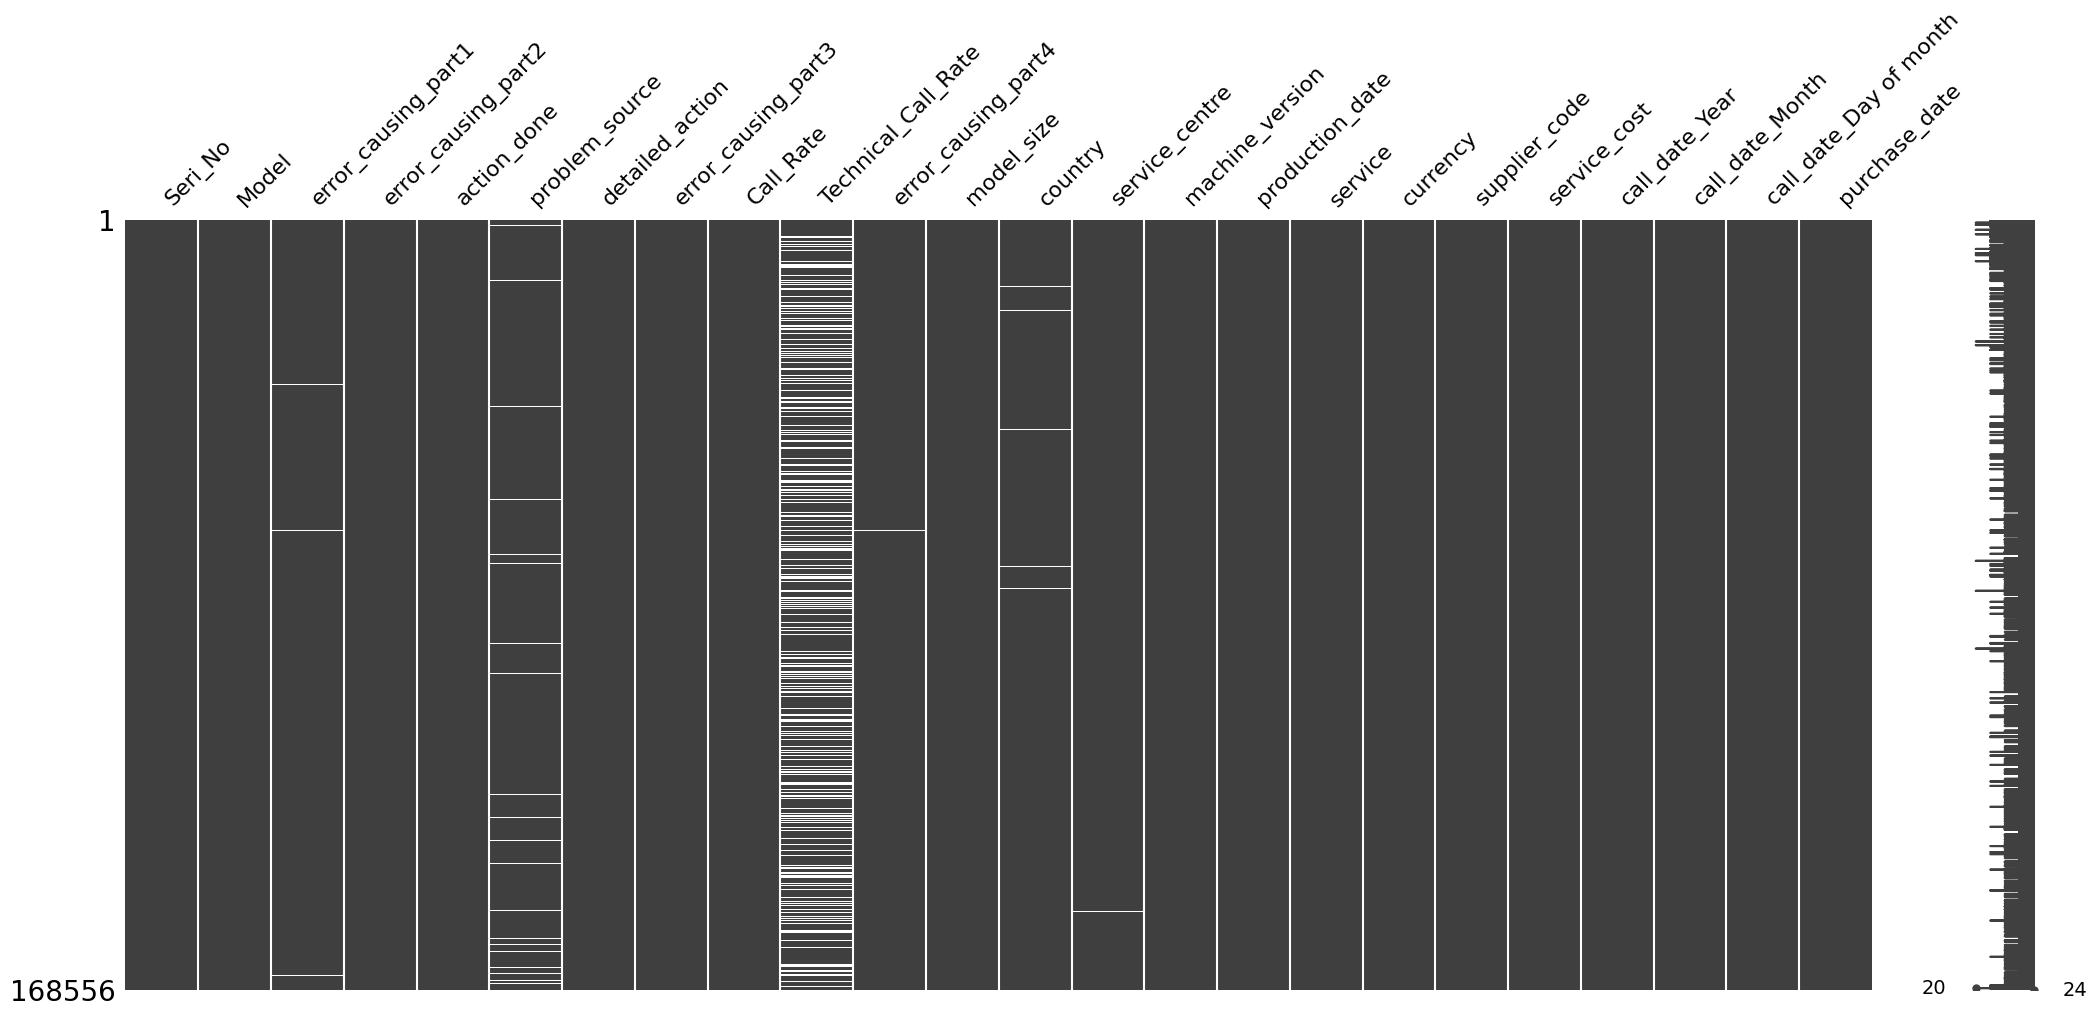

In [22]:
msno.matrix(data);

In [26]:
data['call_date_Year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018])

In [27]:
data['country'].values

array(['Germany', 'United Kingdom', 'India', 'Turkey', 'Sweden',
       'Singapore', 'Finland', 'Spain', nan, 'Slovenia', 'Poland',
       'Italy', 'Switzerland', 'Denmark', 'Belgium', 'Thailand',
       'Hong Kong', 'Norway', 'Ireland', 'Greece', 'Czech Republic',
       'Estonia', 'France', 'Malaysia', 'Turkmenistan', 'Romania',
       'Croatia', 'Russian Fed.', 'Netherlands', 'South Africa',
       'Portugal', 'Hungary', 'Serbia', 'Australia', 'Kazakhstan',
       'Austria', 'Ukraine', 'Bulgaria', 'Luxembourg', 'Chile',
       'New Zealand'], dtype=object)

In [51]:
country_counts = data['country'].value_counts()
valid_countries = country_counts[country_counts >= 1000].index.tolist()
countries_filtered = data[data['country'].isin(valid_countries)]
countries_filtered['country'].value_counts()

Turkey            77871
Germany           21212
United Kingdom    14226
Netherlands        7044
South Africa       5393
France             4119
Spain              3849
India              3597
Italy              3287
Poland             3203
Denmark            2808
Greece             2383
Sweden             2024
Ireland            1803
Belgium            1778
Norway             1526
Finland            1157
Portugal           1027
Name: country, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Turkey'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'South Africa'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'India'),
  Text(8, 0, 'Italy'),
  Text(9, 0, 'Poland'),
  Text(10, 0, 'Denmark'),
  Text(11, 0, 'Greece'),
  Text(12, 0, 'Sweden'),
  Text(13, 0, 'Ireland'),
  Text(14, 0, 'Belgium'),
  Text(15, 0, 'Norway'),
  Text(16, 0, 'Finland'),
  Text(17, 0, 'Portugal')])

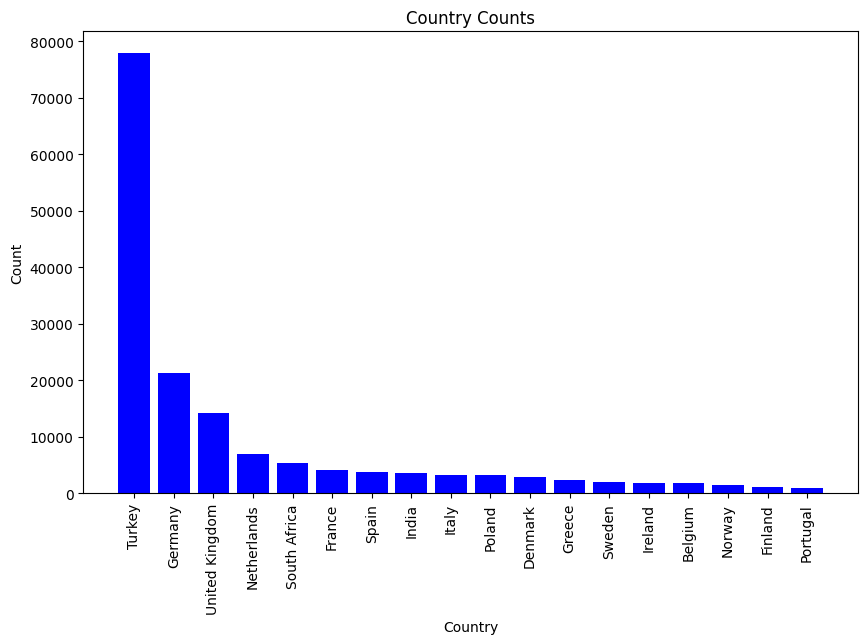

In [53]:
plt.figure(figsize=(10, 6))
country_counts = countries_filtered['country'].value_counts()
plt.bar(country_counts.index, country_counts.values, color='blue')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Counts')

plt.xticks(rotation=90)


In [84]:
df = data

In [85]:
df.head()

,Seri_No,Model,error_causing_part1,error_causing_part2,action_done,problem_source,detailed_action,error_causing_part3,Call_Rate,Technical_Call_Rate,...,machine_version,production_date,service,currency,supplier_code,service_cost,call_date_Year,call_date_Month,call_date_Day of month,purchase_date
0,0,0,Other Mechanical Par,Holder,Part sent to customer (self repair),Special requirements,Part(s) added / posted,Fault diagnosis not possible / not made,CR_100,TCR_100,...,SMART,202211,0,EUR,1000045,5.04,2023,Eylül,29,2023-09-17
1,1,1,Gasket,Boot gasket,Part exchanged,mechanical damage or surface damage (Please gi...,Parts exchanged,Tear/torn,CR_100,TCR_100,...,SMART,202202,0,EUR,1000045,161.40,2023,Eylül,29,2022-11-05
2,2,2,"Pump, Drain-",Pump-drain,Part repaired,Fault code or light appearing on the display (...,Cleaning / Descaling,Congested/blocked,CR_200,TCR_200,...,SMART,202112,1,EUR,1000045,76.85,2023,Eylül,29,2022-04-07
3,3,3,"Module, Power-",Power module program,Part exchanged,Does not function,Parts exchanged,Faulty electrical component/module,CR_100,TCR_100,...,SMART,202104,2,EUR,1000045,65.72,2023,Eylül,29,2022-10-10
4,4,4,NaN,Power module program,Appliance exchanged (reason given),Not working,Appliance exchange/-request (at request of leg...,Faulty electrical component/module,CR_100,TCR_100,...,COLA,202309,3,EUR,1000045,15.31,2023,Eylül,28,2023-09-28


In [86]:
# Fill empty values
df['country'].fillna('Turkey', inplace=True)
df['error_causing_part4'].fillna('FFE Call', inplace=True)
df['error_causing_part3'].fillna('No fault determined (appliance meets specifications)', inplace=True)
df['problem_source'].fillna('Fault code or light appearing on the display (Please give ad', inplace=True)
df['error_causing_part3'].fillna('No fault determined (appliance meets specifications)', inplace=True)
df['action_done'].fillna('Part exchanged', inplace=True),df['error_causing_part2'].fillna('FFE order', inplace=True)
df['error_causing_part1'].fillna('FFE Call', inplace=True)

In [88]:
df['service_cost'] = df['service_cost'] * 29.22

In [89]:
df.head()

,Seri_No,Model,error_causing_part1,error_causing_part2,action_done,problem_source,detailed_action,error_causing_part3,Call_Rate,Technical_Call_Rate,...,machine_version,production_date,service,currency,supplier_code,service_cost,call_date_Year,call_date_Month,call_date_Day of month,purchase_date
0,0,0,Other Mechanical Par,Holder,Part sent to customer (self repair),Special requirements,Part(s) added / posted,Fault diagnosis not possible / not made,CR_100,TCR_100,...,SMART,202211,0,EUR,1000045,4303.194336,2023,Eylül,29,2023-09-17
1,1,1,Gasket,Boot gasket,Part exchanged,mechanical damage or surface damage (Please gi...,Parts exchanged,Tear/torn,CR_100,TCR_100,...,SMART,202202,0,EUR,1000045,137804.675760,2023,Eylül,29,2022-11-05
2,2,2,"Pump, Drain-",Pump-drain,Part repaired,Fault code or light appearing on the display (...,Cleaning / Descaling,Congested/blocked,CR_200,TCR_200,...,SMART,202112,1,EUR,1000045,65615.175540,2023,Eylül,29,2022-04-07
3,3,3,"Module, Power-",Power module program,Part exchanged,Does not function,Parts exchanged,Faulty electrical component/module,CR_100,TCR_100,...,SMART,202104,2,EUR,1000045,56112.288048,2023,Eylül,29,2022-10-10
4,4,4,FFE Call,Power module program,Appliance exchanged (reason given),Not working,Appliance exchange/-request (at request of leg...,Faulty electrical component/module,CR_100,TCR_100,...,COLA,202309,3,EUR,1000045,13071.806604,2023,Eylül,28,2023-09-28


In [90]:
cp_df = df.copy()

In [91]:
month_names_turkish = {
     'Ocak' : 1,  'Şubat':2, 'Mart':3, 'Nisan':4, 'Mayıs':5, 'Haziran':6,
     'Temmuz':7, 'Ağustos':8,'Eylül':9, 'Ekim':10, 'Kasım' : 11, 'Aralık':12
}

df['call_date_Month'] = df['call_date_Month'].map(month_names_turkish)
df["Call_Time"] = pd.to_datetime((df.call_date_Year*10000+df.call_date_Month*100+df['call_date_Day of month']).apply(str),format='%Y%m%d')

df['diff_days'] = (df['Call_Time'] - df['purchase_date']) / np.timedelta64(1, 'M')

df["production_month"] = df["production_date"] % 100
df["production_year"] = df["production_date"] / 100
df["production_year"] = df["production_year"].astype(int)

In [92]:
df.head()

,Seri_No,Model,error_causing_part1,error_causing_part2,action_done,problem_source,detailed_action,error_causing_part3,Call_Rate,Technical_Call_Rate,...,supplier_code,service_cost,call_date_Year,call_date_Month,call_date_Day of month,purchase_date,Call_Time,diff_days,production_month,production_year
0,0,0,Other Mechanical Par,Holder,Part sent to customer (self repair),Special requirements,Part(s) added / posted,Fault diagnosis not possible / not made,CR_100,TCR_100,...,1000045,4303.194336,2023,9,29,2023-09-17,2023-09-29,0.394259,11,2022
1,1,1,Gasket,Boot gasket,Part exchanged,mechanical damage or surface damage (Please gi...,Parts exchanged,Tear/torn,CR_100,TCR_100,...,1000045,137804.675760,2023,9,29,2022-11-05,2023-09-29,10.776402,2,2022
2,2,2,"Pump, Drain-",Pump-drain,Part repaired,Fault code or light appearing on the display (...,Cleaning / Descaling,Congested/blocked,CR_200,TCR_200,...,1000045,65615.175540,2023,9,29,2022-04-07,2023-09-29,17.741637,12,2021
3,3,3,"Module, Power-",Power module program,Part exchanged,Does not function,Parts exchanged,Faulty electrical component/module,CR_100,TCR_100,...,1000045,56112.288048,2023,9,29,2022-10-10,2023-09-29,11.630629,4,2021
4,4,4,FFE Call,Power module program,Appliance exchanged (reason given),Not working,Appliance exchange/-request (at request of leg...,Faulty electrical component/module,CR_100,TCR_100,...,1000045,13071.806604,2023,9,28,2023-09-28,2023-09-28,0.000000,9,2023


# Representation Of Data

In [95]:
df.columns
features = ['Seri_No', 'Model', 'error_causing_part1', 'error_causing_part2',
       'action_done', 'problem_source', 'detailed_action',
       'error_causing_part3', 'Call_Rate', 'Technical_Call_Rate',
       'error_causing_part4', 'model_size', 'country', 'service_centre',
       'machine_version', 'production_date', 'service', 'currency',
       'supplier_code', 'service_cost', 'call_date_Year', 'call_date_Month',
       'call_date_Day of month', 'purchase_date', 'Call_Time', 'diff_days',
       'production_month', 'production_year']
print(features)

['Seri_No', 'Model', 'error_causing_part1', 'error_causing_part2', 'action_done', 'problem_source', 'detailed_action', 'error_causing_part3', 'Call_Rate', 'Technical_Call_Rate', 'error_causing_part4', 'model_size', 'country', 'service_centre', 'machine_version', 'production_date', 'service', 'currency', 'supplier_code', 'service_cost', 'call_date_Year', 'call_date_Month', 'call_date_Day of month', 'purchase_date', 'Call_Time', 'diff_days', 'production_month', 'production_year']


# Train Test Split

In [97]:
new_df = df.drop(columns=['Seri_No', 'currency', 'call_date_Day of month',
                          'call_date_Month', 'call_date_Year', 'purchase_date',
                          'production_year', 'Call_Time', 'production_month'])


,Model,error_causing_part1,error_causing_part2,action_done,problem_source,detailed_action,error_causing_part3,Call_Rate,Technical_Call_Rate,error_causing_part4,model_size,country,service_centre,machine_version,production_date,service,supplier_code,diff_days
0,0,Other Mechanical Par,Holder,Part sent to customer (self repair),Special requirements,Part(s) added / posted,Fault diagnosis not possible / not made,CR_100,TCR_100,Other Mechanical Par,G11,Germany,WS,SMART,202211,0,1000045,0.394259
1,1,Gasket,Boot gasket,Part exchanged,mechanical damage or surface damage (Please gi...,Parts exchanged,Tear/torn,CR_100,TCR_100,Gasket,G11,Germany,MI,SMART,202202,0,1000045,10.776402
2,2,"Pump, Drain-",Pump-drain,Part repaired,Fault code or light appearing on the display (...,Cleaning / Descaling,Congested/blocked,CR_200,TCR_200,"Pump, Drain-",G11,United Kingdom,RK,SMART,202112,1,1000045,17.741637
3,3,"Module, Power-",Power module program,Part exchanged,Does not function,Parts exchanged,Faulty electrical component/module,CR_100,TCR_100,"Module, Power-",G11,India,03,SMART,202104,2,1000045,11.630629
4,4,FFE Call,Power module program,Appliance exchanged (reason given),Not working,Appliance exchange/-request (at request of leg...,Faulty electrical component/module,CR_100,TCR_100,FFE Call,G15,Turkey,04,COLA,202309,3,1000045,0.000000


In [99]:
dummy = pd.get_dummies(new_df, columns=['error_causing_part1', 'error_causing_part2', 'action_done',
                                        'problem_source', 'detailed_action', 'error_causing_part3',
                                        'Call_Rate', 'Technical_Call_Rate', 'error_causing_part4',
                                        'model_size', 'country', 'service_centre', 'machine_version'])

In [101]:
X = dummy.drop(columns=['service_cost'])
y = dummy['service_cost']
X.head()

,Model,production_date,service,supplier_code,diff_days,error_causing_part1_(Inner) Drum,error_causing_part1_AQUASTOP VALVE,error_causing_part1_Agitator Paddle (Dru,error_causing_part1_Air Damper,error_causing_part1_Base Plate / Through,...,service_centre_WE,service_centre_WG,service_centre_WO,service_centre_WP,service_centre_WR,service_centre_WS,service_centre_XK,service_centre_ZV,machine_version_COLA,machine_version_SMART
0,0,202211,0,1000045,0.394259,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,202202,0,1000045,10.776402,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,202112,1,1000045,17.741637,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,202104,2,1000045,11.630629,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,202309,3,1000045,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, train_size=0.5, shuffle=True)

# Train

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


In [ ]:
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

In [103]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)


LinearRegression()

In [108]:
y_pred = linear_regressor.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

47692441.965626426
